

<CENTER>
<div style=width:500px;border-radius:10px;height:220px;background-color:#ffcccc;text-align:center;vertical-align:middle;>

   
<font size=14, font color=navy>Bases de données

</div>
</CENTER>

# GENERALITES

* Données :
    * Stockage ?
    * Forme ?    
    $\rightarrow$ Taille - encombrement   
    $\rightarrow$ Persistance et robustesse  
    $\rightarrow$ Accès et modification aisés


### Insuffisance des tableaux bidimensionnels 

|NUM | NOM | FONCTION | DEPT | DOMAINE | SITE|
|---|---|---|---|---|---|
|143|JONES|VENDEUR|10|VENTE|CHICAGO|
|136|JONES|ANALYSTE|20|FINANCE|CHICAGO|
|112|GRANT|VENDEUR|10|VENTE|CHICAGO|
|197|SMITH|VENDEUR|11|VENTE|NEW YORK|
|136|JONES|MANAGER|20|FINANCE|CHICAGO|
|113|ADAMS|PRESIDENT|20|FINANCE|CHICAGO|
|113|ADAMS|PRESIDENT|10|VENTE|CHICAGO|
|113|ADAMS|PRESIDENT|11|VENTE|NEW YORK|
|167|NICHOLS|VENDEUR|11|VENTE|NEW YORK|


### Problème de redondance de l'information
* Apparitions multiples d'individus $\rightarrow$ comptage difficile
* Modification laborieuse

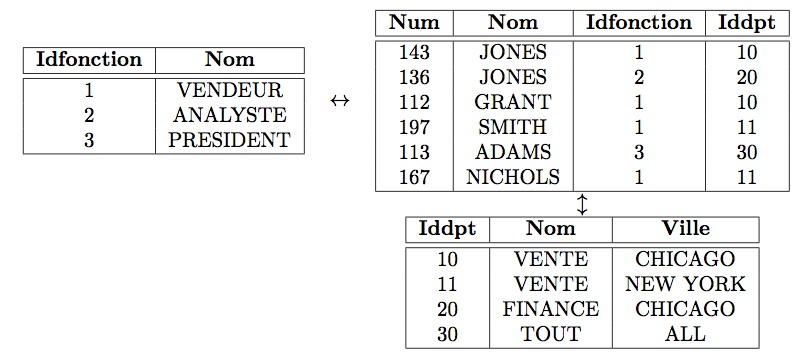

In [28]:
from IPython.display import Image,display
i = Image(filename='figbdd.jpg')
display(i)

In [271]:
#from IPython.display import Image,display
j = Image(filename='figbdd1.jpg')
k = Image(filename='figbdd2.jpg')
l=Image(filename='figbdd4.jpg')
m=Image(filename='figbdd3.jpg')
n=Image(filename='figbdd5.jpg')

$\rightarrow$ Plus de redondance !.. ou presque.    
$\rightarrow$ Attention à la polysémie suivant la table

* Organisation bidimensionnelle :
    * Lourde $\leftrightarrow$ Larges données
    * Insuffisante $\leftrightarrow$ liens ou <i>relations</i> entre données
    * Redondante

$\rightarrow$ Manque de structure    
$\rightarrow$ Manque de cohérence

### Base de données : BDD (DataBase DB)
* Modélise une collection d'informations liées
* Ensemble ordonné et structuré de données
    * Schéma $\leftrightarrow$ structure
    * Contenu $\leftrightarrow$ valeurs
* Forme de fichiers interdépendants
    * Tables $\leftrightarrow$ Relation:
        * Colonnes $\leftrightarrow$ <b>Champs</b> ou attributs    
        $\rightarrow$ Propriétés (noms, adresse,...)
        * Lignes $\leftrightarrow$ <b>Enregistrements</b>    
        $\rightarrow$ Instances des propriétés    
        $\rightarrow$ Tuples
    * Liens entre tables $\leftrightarrow$ Associations


### Clés primaires et identification
* Clé primaire :
    * Dans une même table
    * Champ ou tuple de champs
    * Déterminent de manière unique chaque enregistrement    
    $\approx$ Identifiant
    $\rightarrow$ souligné(s) dans la table
* Exemple (RH) :
    * FONCTION(<u>Idfonction</u>,Nom)
    * INDIVIDU(<u>Num</u>,Nom,Idfonction,Iddpt)
    * DEPARTEMENT(<u>Iddpt</u>,Nom,Ville)

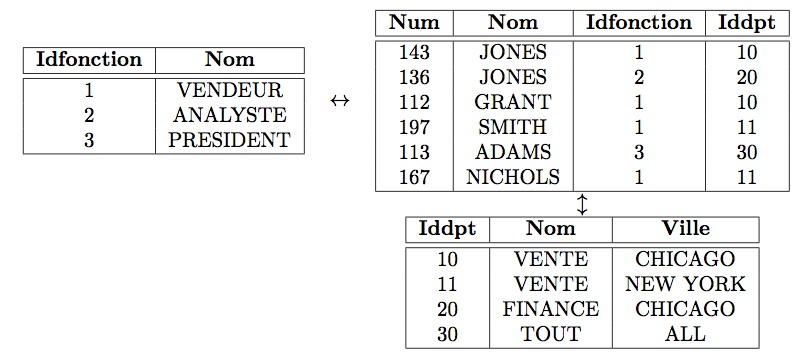

In [12]:
display(i)

* Plusieurs champs :    
    * même nom
    * valeurs différentes
    * tables différentes    
$\rightarrow$ Peu importe

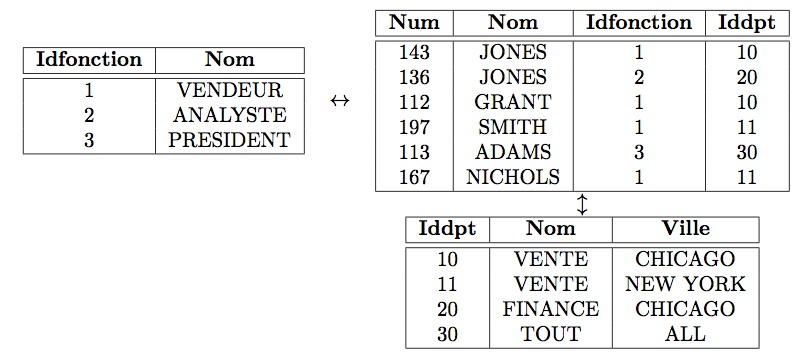

In [13]:
display(i)

### Clés étrangères et associations
* Certains champs (Iddpt, Idfonction):
    * même nom, mêmes valeurs
    * tables différentes

$\rightarrow$ <b>Clés étrangères</b>$\rightarrow$ Définissent les associations entre tables

### SGBD

<b>Système de gestion de bases de données</b> (Data Base Management System ou DBMS)
Permet :
* Définir la structure des données
* Administrer les droits utilisateurs
* Stocker, modifier et accéder aux données
* Garantir leur intégrité (multi-utilisateurs)
* Développer des applications

<b>SQLite</b>, MySQL, ORACLE, MICROSOFT ACCESS

### SQL (structured query langage)
* Langage de manipulation de données    
$\rightarrow$ <b>SELECT, UPDATE, INSERT, DELETE</b>
* Langage de définition de données    
$\rightarrow$ <b>CREATE</b>, DROP, ALTER
* Langage de contrôle de données    
$\rightarrow$ GRANT, REVOKE, <b>CONNECT</b>, COMMIT, ROLLBACK, SET

# CREATION DE BDD - RENSEIGNEMENT

## Hypothèses
* Le Schéma de la BDD est défini
* Une BDD vide est crée et nommée
* On est connecté à la BDD    
$\rightarrow$ Comment la renseigner (la remplir) ?

In [1]:
%load_ext sql
%sql sqlite:///DRH

u'Connected: None@DRH'

## Création de Table

|CREATE TABLE Nom_table(champ1 TYPE, champ2 TYPE,...)|
|---|

* Types INTEGER, VARCHAR(128), VARCHAR(256), FLOAT, BINARY, IMAGE
* Ensuite dans l'ordre :
    * PRIMARY KEY
    * NOT NULL
    * Type INTEGER $\rightarrow$ AUTOINCREMENT=n

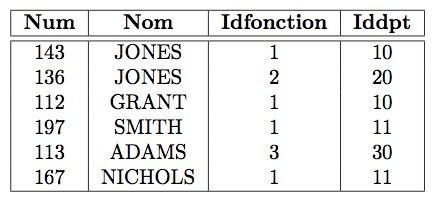

In [37]:
display(j)

In [2]:
%%%sql
CREATE TABLE Individus(Num INTEGER PRIMARY KEY,Nom VARCHAR(128),Idfonction INTEGER,Iddpt INTEGER)

(sqlite3.OperationalError) table Individus already exists [SQL: u'CREATE TABLE Individus(Num INTEGER PRIMARY KEY,Nom VARCHAR(128),Idfonction INTEGER,Iddpt INTEGER)']


In [35]:
%%sql 
CREATE TABLE Individu (Num INTEGER PRIMARY KEY AUTOINCREMENT,
                       Nom VARCHAR(128),Idfonction INTEGER,Iddpt INTEGER)


Done.


[]

### Clés Primaire :
* Au moment de déclarer le champ : Num INTEGER PRIMARY KEY
* En fin de CREATE : PRIMARY KEY (Champ) ou PRIMARY KEY (c1,...cp)

In [6]:
%%sql
CREATE TABLE Lapin (Num INTEGER, Numbis INTEGER, Numter INTEGER,
                    PRIMARY KEY (Numbis) ) 

Done.


[]

In [7]:
%sql PRAGMA table_info(Lapin)
#pk = primary key

Done.


cid,name,type,notnull,dflt_value,pk
0,Num,INTEGER,0,None,0
1,Numbis,INTEGER,0,None,1
2,Numter,INTEGER,0,None,0


* Un tuple de champs peut être une clé primaire
* Redondance interdite    
$\rightarrow$ devient une contrainte de construction de la table

In [11]:
%%sql
CREATE TABLE Renard (Num INTEGER, Numbis INTEGER,Numter INTEGER,
                     PRIMARY KEY (Num,Numbis),
                     CONSTRAINT couple UNIQUE(Num,Numbis))  

Done.


[]

In [25]:
%%%sql 
PRAGMA table_info(Renard);
#DROP TABLE Renard

Done.


cid,name,type,notnull,dflt_value,pk
0,Num,INTEGER,0,None,1
1,Numbis,INTEGER,0,None,2
2,Numter,INTEGER,0,None,0


## Suppression de Table

|DROP TABLE Nom_table|
|---|


In [29]:
%sql PRAGMA table_info(Renard)

Done.


[]

In [26]:
%sql DROP TABLE Lapin
%sql DROP TABLE Renard

Done.
Done.


[]

In [30]:
#Les tables qui restent dans la BDD
%sql SELECT name FROM sqlite_master WHERE type='table'

Done.


name
Individus


On verra plus tard comment est apparu le champ sqlite_sequence   
(à cause des auto-incrémentations dans Individus)

## Renseignement d'une Table

|INSERT INTO Table (champ1,champ2,..) VALUES(val11,val12,..),...|
|---|

* Après VALUES :    
    $\rightarrow$ chaque enregistrement comme un tuple    
    $\rightarrow$ autant de tuples que de ligne


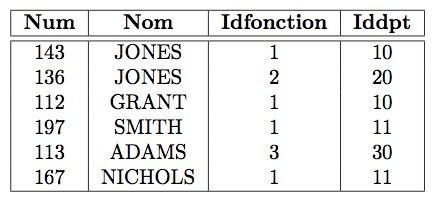

In [62]:
display(j)

In [32]:
%%sql
INSERT INTO Individus (Nom,Idfonction,Iddpt) 
    VALUES  ('JONES',1,10),
            ('JONES',2,20),
            ('GRANT',1,10),
            ('SMITH',1,11),
            ('ADAMS',3,30),
            ('NICHOLS',1,11)

6 rows affected.


[]

### A VOUS !

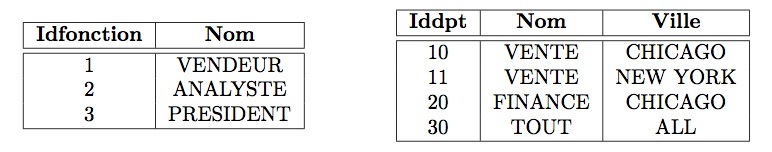

In [64]:
display(k)

In [35]:
%%sql
CREATE TABLE Fonctions(Idfonction INTEGER,Nom VARCHAR(128));
INSERT INTO Fonctions (Idfonction,Nom) VALUES ((1,'VENDEUR'),(2,'ANALYSTE'),(3,'PRESIDENT'))


(sqlite3.OperationalError) table Fonctions already exists [SQL: u'CREATE TABLE Fonctions(Idfonction INTEGER,Nom VARCHAR(128));']


In [71]:
%%sql
CREATE TABLE Fonction (
    Idfonction INTEGER,
    Nom VARCHAR(128))

Done.


[]

In [ ]:
%%sql
INSERT INTO Fonction (Idfonction,Nom)
       VALUES (1,'VENDEUR'),
              (2,'ANALYSTE'),
              (3,'PRESIDENT')

In [36]:
%%sql
CREATE TABLE Departement (
    Iddpt INTEGER,
    Nom VARCHAR(128),
    Ville VARCHAR(128))

Done.


[]

In [37]:
%%sql
INSERT INTO Departement (Iddpt,Nom,Ville)
        VALUES (10,'VENTE','CHICAGO'),
               (11,'VENTE','NEW YORK'),
               (20,'FINANCE','CHICAGO'),
               (30,'TOUT','ALL')

4 rows affected.


[]

## Association
* En fin de CREATE
* En rappelant le champ identique par  AutreTable(champ)
    
|FOREIGN KEY (champ) REFERENCES AutreTable(champ)|
|---|

 * Autant de fois que nécessaire (associations multiples)

On peut donc jeter nos tables Fonction et Departement !    
... et tout recommencer en n'oubliant pas les associations.

In [38]:
%sql DROP TABLE Fonction
%sql DROP TABLE Departement

(sqlite3.OperationalError) no such table: Fonction [SQL: u'DROP TABLE Fonction']
Done.


[]

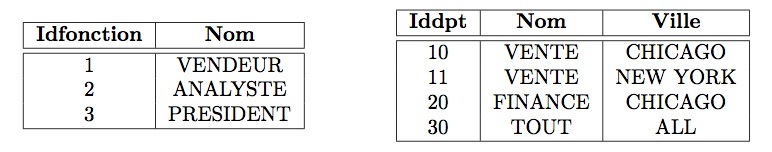

In [68]:
#On recommence !
display(k)

#### Création des tables

In [39]:
%%sql
CREATE TABLE Fonction (
    Idfonction INTEGER,
    Nom VARCHAR(128),
    FOREIGN KEY (Idfonction) REFERENCES Individu(Idfonction))

Done.


[]

In [40]:
%%sql
CREATE TABLE Departement (
    Iddpt INTEGER,
    Nom VARCHAR(128),
    Ville VARCHAR(128),
    FOREIGN KEY (Iddpt) REFERENCES Individu(Iddpt))

Done.


[]

#### Renseignement

In [41]:
%%sql
INSERT INTO Fonction (Idfonction,Nom)
       VALUES (1,'VENDEUR'),
              (2,'ANALYSTE'),
              (3,'PRESIDENT')

3 rows affected.


[]

In [42]:
%%sql
INSERT INTO Departement (Iddpt,Nom,Ville)
        VALUES (10,'VENTE','CHICAGO'),
               (11,'VENTE','NEW YORK'),
               (20,'FINANCE','CHICAGO'),
               (30,'TOUT','ALL')

4 rows affected.


[]

### Détour par sqlite sequence

In [44]:
%sql SELECT * FROM sqlite_sequence

(sqlite3.OperationalError) no such table: sqlite_sequence [SQL: u'SELECT * FROM sqlite_sequence']


Chaque enregistrement répertorie :
   * Nom du champ incrémenté
   * Nombre d'incrémentations

# INTERROGATION

## Chinook : BDD de travail

* BDD de disquaire 
* Accessible sur le net https://chinookdatabase.codeplex.com/
* Tables :
    * Album(<u>AlbumId</u>,Title,ArtistId)
    * Artist(<u>ArtistId</u>,Name)
    * Genre(<u>genreId</u>,Name)
    * Track(<u>TrackId</u>,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice) 
    * Mediatype(<u>MediaTypeId</u>,Name)
    * Customer(...)
    * Employee(...)

In [4]:
%%sql 
sqlite:///Chinook_Sqlite.sqlite

u'Connected: None@Chinook_Sqlite.sqlite'

In [46]:
%sql SELECT name FROM sqlite_master WHERE type='table'

Done.


name
Album
Artist
Customer
Employee
Genre
Invoice
InvoiceLine
MediaType
Playlist
PlaylistTrack


In [47]:
%sql PRAGMA table_info(Artist)

Done.


cid,name,type,notnull,dflt_value,pk
0,ArtistId,INTEGER,1,None,1
1,Name,NVARCHAR(120),0,None,0


In [48]:
%sql PRAGMA table_info(Track)

Done.


cid,name,type,notnull,dflt_value,pk
0,TrackId,INTEGER,1,None,1
1,Name,NVARCHAR(200),1,None,0
2,AlbumId,INTEGER,0,None,0
3,MediaTypeId,INTEGER,1,None,0
4,GenreId,INTEGER,0,None,0
5,Composer,NVARCHAR(220),0,None,0
6,Milliseconds,INTEGER,1,None,0
7,Bytes,INTEGER,0,None,0
8,UnitPrice,"NUMERIC(10,2)",1,None,0


## Requêtes simples : SELECT

#### Requête $\leftrightarrow$ Sélection de champs $\leftrightarrow$ projection

* Requête SELECT
* Champs à sélectionner : tuple (ch1,ch2,...)    
$\rightarrow$ raccourci pour tous les champs : \*
* Nom de la Table après FROM
* éventuelle condition booléenne après WHERE
    
|SELECT (ch1,ch2,...) FROM Table WHERE Condition|
|---|


#### Condition booléenne :
* En fonction de champs (conditionnés)
* Préciser la table : Table.nomchamp
* =,<,<=,>,>=,!=, NOT, AND, OR    
$\rightarrow$ directement sur les champs conditionnés
* Autres requêtes HP     
$\rightarrow$ Sur des requêtes (SELECT...)
    * IN $\rightarrow$ test d'appartenance à la <i>requête</i> suivante
    * EXISTS $\rightarrow$ teste si la <i>requête</i> suivante n'est pas vide
    * ALL/ANY $\rightarrow$ teste la vérité d'une condition sur tous les enregistrements de la <i>requête</i> suivante    
    $\leadsto$ <b>exclu en SQLite</b>

#### Résultat de requête Liste de tuples
* Chaque élément de la liste $\leftrightarrow$ tuple: 
    * Correspond à un enregistrement
    * Vérifiant les conditions booléennes
* Chaque tuple :
    * Coordonnées (instances de champs) déclarées après SELECT (projection)
    * Pour tout enregistrement vérifiant la condition

## Pratiquons

* Tous les enregistrements de la Table Artist

In [55]:
L=%sql SELECT * FROM Artist
print(L)

Done.
+----------+---------------------------------------------------------------------------------------+
| ArtistId |                                          Name                                         |
+----------+---------------------------------------------------------------------------------------+
|    1     |                                         AC/DC                                         |
|    2     |                                         Accept                                        |
|    3     |                                       Aerosmith                                       |
|    4     |                                   Alanis Morissette                                   |
|    5     |                                    Alice In Chains                                    |
|    6     |                                  Antônio Carlos Jobim                                 |
|    7     |                                      Apocalyptica                       

In [89]:
%sql SELECT * FROM Artist

Done.


ArtistId,Name
1,AC/DC
2,Accept
3,Aerosmith
4,Alanis Morissette
5,Alice In Chains
6,Antônio Carlos Jobim
7,Apocalyptica
8,Audioslave
9,BackBeat
10,Billy Cobham


* C'est <i>à proprement parler</i> <b>magique</b>    
$\rightarrow$ le résultat est structuré    
$\rightarrow$ c'est un tableau html    
$\rightarrow$ c'est lié à IPython et \_repr\_html\_    
$\rightarrow$ mais... on oublie (provisoirement) $\rightarrow$ POO
* Assignons le résultat et représentons-le

In [56]:
res=%sql SELECT * FROM Artist
L=list(res)
L

Done.


[(1, u'AC/DC'),
 (2, u'Accept'),
 (3, u'Aerosmith'),
 (4, u'Alanis Morissette'),
 (5, u'Alice In Chains'),
 (6, u'Ant\xf4nio Carlos Jobim'),
 (7, u'Apocalyptica'),
 (8, u'Audioslave'),
 (9, u'BackBeat'),
 (10, u'Billy Cobham'),
 (11, u'Black Label Society'),
 (12, u'Black Sabbath'),
 (13, u'Body Count'),
 (14, u'Bruce Dickinson'),
 (15, u'Buddy Guy'),
 (16, u'Caetano Veloso'),
 (17, u'Chico Buarque'),
 (18, u'Chico Science & Na\xe7\xe3o Zumbi'),
 (19, u'Cidade Negra'),
 (20, u'Cl\xe1udio Zoli'),
 (21, u'Various Artists'),
 (22, u'Led Zeppelin'),
 (23, u'Frank Zappa & Captain Beefheart'),
 (24, u'Marcos Valle'),
 (25, u'Milton Nascimento & Bebeto'),
 (26, u'Azymuth'),
 (27, u'Gilberto Gil'),
 (28, u'Jo\xe3o Gilberto'),
 (29, u'Bebel Gilberto'),
 (30, u'Jorge Vercilo'),
 (31, u'Baby Consuelo'),
 (32, u'Ney Matogrosso'),
 (33, u'Luiz Melodia'),
 (34, u'Nando Reis'),
 (35, u'Pedro Lu\xeds & A Parede'),
 (36, u'O Rappa'),
 (37, u'Ed Motta'),
 (38, u'Banda Black Rio'),
 (39, u'Fernanda Porto

In [57]:
res[0],L[0]

((1, u'AC/DC'), (1, u'AC/DC'))

Le résultat de la requête est bien une liste de tuples

* Les noms des types de medias

In [58]:
%sql SELECT Name FROM Mediatype

Done.


Name
MPEG audio file
Protected AAC audio file
Protected MPEG-4 video file
Purchased AAC audio file
AAC audio file


* Le nom du genre 4

In [59]:
%sql SELECT Name FROM Genre WHERE GenreId=4

Done.


Name
Alternative & Punk


* Tous les enregistrements de la table artiste pour l'artiste d'identifiant 12

In [61]:
%sql SELECT * FROM Artist WHERE ArtistId=12

Done.


ArtistId,Name
12,Black Sabbath


* Tous les titres d'album de l'artiste d'identifiant 12

In [62]:
%sql SELECT Title FROM Album WHERE ArtistId=12

Done.


Title
Black Sabbath
Black Sabbath Vol. 4 (Remaster)


* Tous les titres d'albums d'un des artiste dont l'identifiant est 12, 13, 14 ou 15

In [68]:
%sql SELECT Title FROM Album WHERE ArtistId IN [(12,),(13,),(14,)]

(sqlite3.OperationalError) no such table: (12,),(13,),(14,) [SQL: u'SELECT Title FROM Album WHERE ArtistId IN [(12,),(13,),(14,)]']


* Tous les titres de morceaux dont le genre a pour identifiant 2 et dont la durée est supérieure à 400000ms.

In [69]:
%sql SELECT Name FROM Track WHERE GenreId=2 AND Milliseconds>400000

Done.


Name
Snoopy's search-Red baron
Stratus
Walkin'
Bye Bye Blackbird
So What
Someday My Prince Will Come
My Funny Valentine (Live)
Nefertiti
Petits Machins (Little Stuff)
Miles Runs The Voodoo Down


* Toutes les durées et les noms des morceaux appartenant au genre 4

In [ ]:
# A vous

In [205]:
r1=%sql SELECT * FROM Artist WHERE ArtistId=12
r2=%sql SELECT Title FROM Album WHERE ArtistId=12
r3=%sql SELECT Title FROM Album WHERE ArtistId=12 OR ArtistId=13 OR ArtistId=14 OR ArtistId=15
#r3b=%sql SELECT Title FROM Album WHERE ArtistId IN [(12,),(13,),(14,),(15,)]
#Ne fonctionne pas : pas le bon type
#Bilan : ne pas essayer de singer une requête
r4=%sql SELECT Name FROM Track WHERE GenreId=2 AND Milliseconds>400000
r5=%sql SELECT Milliseconds,Name FROM Track WHERE GenreId=4
r6=%sql SELECT Name FROM Genre WHERE GenreId=4
r7=%sql SELECT Name FROM Mediatype
type(r3)

Done.
Done.
Done.
Done.
Done.
Done.
Done.


sql.run.ResultSet

### Limitation 
$n\in \mathbb{N}^\star$
* LIMIT n : renvoie seulement les n premiers enregistrements
* OFFSET n : renvoie les enregistrements strictement après le nième    
$\rightarrow$ En <b>fin</b> de requête    
$\rightarrow$ Se composent : LIMIT n OFFSET p    
$\rightarrow$ Pas de OFFSET sans LIMIT    
    OFFSET illimité $\leftrightarrow$ LIMIT -1

* Identifiants des artistes correspondant aux 10 premiers albums

In [70]:
%sql SELECT ArtistId FROM Album LIMIT 10

Done.


ArtistId
1
1
2
2
3
4
5
6
6
7


In [199]:
%sql SELECT ArtistId FROM Album LIMIT 10
#Doublons

Done.


ArtistId
1
1
2
2
3
4
5
6
6
7


* Genres des 20 morceaux situés après le 2017ème

In [72]:
%sql SELECT GenreId FROM Track LIMIT 2037 OFFSET 2017

Done.


GenreId
4
4
4
4
4
4
4
4
4
4


In [73]:
%sql SELECT GenreId FROM Track LIMIT 20 OFFSET 2017

Done.


GenreId
4
4
4
4
4
4
4
4
4
4


* Genres des morceaux situés après le 2017ème

In [74]:
%sql SELECT GenreId FROM Track OFFSET 2017

(sqlite3.OperationalError) near "2017": syntax error [SQL: u'SELECT GenreId FROM Track OFFSET 2017']


In [75]:
%sql SELECT GenreId FROM Track LIMIT -1 OFFSET 2017

Done.


GenreId
4
4
4
4
4
4
4
4
4
4


### Non répétition : DISTINCT

* SELECT : autorise les doublons
* SELECT DISTINCT : pas   
$\rightarrow$ Effet : ignore les doublons    
$\rightarrow$ Avec LIMIT : continue la requête tant que la limite sans doublons n'est pas atteinte

* Identifiants distincts des genres représentés dans Track

In [77]:
%sql SELECT DISTINCT GenreId FROM Track

Done.


GenreId
1
2
3
4
5
6
7
8
9
10


In [123]:
%sql SELECT DISTINCT GenreId FROM Track

Done.


GenreId
1
2
3
4
5
6
7
8
9
10


* Noms distincts de tous les compositeurs

In [78]:
%sql SELECT DISTINCT Composer FROM Track

Done.


Composer
"Angus Young, Malcolm Young, Brian Johnson"
None
"F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman"
"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman"
Deaffy & R.A. Smith-Diesel
AC/DC
"Steven Tyler, Joe Perry, Jack Blades, Tommy Shaw"
"Steven Tyler, Joe Perry"
"Steven Tyler, Joe Perry, Jim Vallance, Holly Knight"
"Steven Tyler, Joe Perry, Desmond Child"


In [125]:
%sql SELECT DISTINCT Composer FROM Track

Done.


Composer
"Angus Young, Malcolm Young, Brian Johnson"
None
"F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman"
"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman"
Deaffy & R.A. Smith-Diesel
AC/DC
"Steven Tyler, Joe Perry, Jack Blades, Tommy Shaw"
"Steven Tyler, Joe Perry"
"Steven Tyler, Joe Perry, Jim Vallance, Holly Knight"
"Steven Tyler, Joe Perry, Desmond Child"


* Noms distincts de tous les compositeurs pour le genre 9

In [80]:
%sql SELECT DISTINCT Composer FROM Track WHERE GenreId=9
%sql SELECT Name FROM Genre WHERE GenreId=9

Done.
Done.


Name
Pop


In [148]:
res=%sql SELECT DISTINCT Composer FROM Track WHERE GenreId=9

Done.


In [150]:
print(list(res))

[(u'Cassiano Costa/Cintia Maviane/J.F./Lucas Costa',), (u'Augusto Concei\xe7\xe3o/Chiclete Com Banana',), (u'Cal Adan/Paulo Levi',), (u'Paulo Levi/W. Rangel',), (u'Jorge Cardoso/Pierre Onasis',), (u'F\xe1bio Nolasco/Gal Sales/Ivan Brasil',), (u'Garay, Ricardo Engels/Luca Predabom/Ludwig, Carlos Henrique/Maur\xedcio Vieira',), (u'Luiz Wanderley/Paulo Levi',), (u'Do Vale, Valverde/Gal Oliveira/Luciano Pinto',), (u'Cal Adan/Ferrugem/Julinho Carioca/Tr\xedona N\xed Dhomhnaill',), (u'Lucina/Luli',), (u'Cal Adan/Del Rey, Tension/Edu Casanova',), (u'Jauperi/Zeu G\xf3es',), (u'Adriano Bernandes/Edmar Neves',), (None,), (u'Salaam Remi',), (u'Isham Jones & Marty Symes',), (u'Luke Smith',), (u'Matt Rowe & Stefan Skarbek',), (u'Delroy "Chris" Cooper, Donovan Jackson, Earl Chinna Smith, Felix Howard, Gordon Williams, Luke Smith, Paul Watson & Wilburn Squiddley Cole',), (u'Freddy James, Jimmy hogarth & Larry Stock',), (u'Astor Campbell, Delroy "Chris" Cooper, Donovan Jackson, Dorothy Fields, Earl Ch

Est-ce que DISTINCT et LIMIT permettent d'obtenir sans doublons les identifiants des artistes correspondant aux 10 premiers albums ?

In [82]:
% sql SELECT DISTINCT ArtistId FROM Album LIMIT 10
%sql SELECT ArtistId FROM Album LIMIT 10

Done.
Done.


ArtistId
1
1
2
2
3
4
5
6
6
7


## Compositions de requêtes

* Composition $\leftrightarrow$ sous-requêtes

|SELECT....FROM (SELECT...)|
|---|

|SELECT...FROM...WHERE...IN (SELECT...)|
|--|

|SELECT...FROM...WHERE...EXISTS (SELECT...)|
|--|

|SELECT...FROM...WHERE...ALL (SELECT...)|
|--|

$\rightarrow$ Prétraitement    
$\rightarrow$ Recherches croisées dans plusieurs Tables

* Identifiants sans doublons des Artistes correspondant aux 10 premiers Albums

In [85]:
%sql SELECT DISTINCT ArtistId FROM (SELECT * FROM Album LIMIT 10)

Done.


ArtistId
1
2
3
4
5
6
7
8


In [84]:
%sql SELECT DISTINCT ArtistId FROM (SELECT ArtistId FROM Album LIMIT 10)

Done.


ArtistId
1
2
3
4
5
6
7


* Titres des Albums dont au moins une chanson fait 700000ms

In [89]:
%sql SELECT Album.Title FROM Album WHERE Album.albumId IN (SELECT DISTINCT Track.AlbumId FROM Track WHERE Milliseconds>=700000)

Done.


Title
BBC Sessions [Disc 1] [Live]
MK III The Final Concerts [Disc 1]
Supernatural
The Essential Miles Davis [Disc 1]
The Essential Miles Davis [Disc 2]
The Final Concerts (Disc 2)
Live After Death
Powerslave
BBC Sessions [Disc 2] [Live]
The Song Remains The Same (Disc 1)


In [157]:
%sql SELECT Title FROM Album WHERE Album.AlbumId IN (SELECT DISTINCT Track.AlbumId FROM Track WHERE Milliseconds>700000)
#Prétraitement dans une autre table

Done.


Title
BBC Sessions [Disc 1] [Live]
MK III The Final Concerts [Disc 1]
Supernatural
The Essential Miles Davis [Disc 1]
The Essential Miles Davis [Disc 2]
The Final Concerts (Disc 2)
Live After Death
Powerslave
BBC Sessions [Disc 2] [Live]
The Song Remains The Same (Disc 1)


* Impression : sous-requête effectuée une fois pour toute.
* En fait : réévaluée à chaque examen d'un enregistrement.    
$\rightarrow$ Possibilité de faire des "boucles"

In [91]:
%%sql 
SELECT Title From Album WHERE 
EXISTS (SELECT * FROM Track WHERE Milliseconds>=700000 
  AND Track.AlbumId=Album.AlbumId)

Done.


Title
BBC Sessions [Disc 1] [Live]
MK III The Final Concerts [Disc 1]
Supernatural
The Essential Miles Davis [Disc 1]
The Essential Miles Davis [Disc 2]
The Final Concerts (Disc 2)
Live After Death
Powerslave
BBC Sessions [Disc 2] [Live]
The Song Remains The Same (Disc 1)


* Titres des Albums ayant au moins une chanson sans compositeur

In [97]:
%sql SELECT Album.Title FROM Album WHERE EXISTS (SELECT * FROM Track WHERE Track.AlbumId=Album.AlbumId AND Track.Composer IS NULL) 

Done.


Title
Balls to the Wall
Warner 25 Anos
Alcohol Fueled Brewtality Live! [Disc 1]
Alcohol Fueled Brewtality Live! [Disc 2]
Black Sabbath
Body Count
Sozinho Remix Ao Vivo
Minha Historia
Da Lama Ao Caos
Na Pista


In [96]:
%%sql
SELECT DISTINCT Title FROM Album WHERE
    EXISTS (SELECT * FROM Track WHERE Composer IS NOT NULL AND Track.AlbumId=Album.AlbumId)

Done.


Title
For Those About To Rock We Salute You
Restless and Wild
Let There Be Rock
Big Ones
Jagged Little Pill
Facelift
Plays Metallica By Four Cellos
Audioslave
Out Of Exile
BackBeat Soundtrack


* EXISTS    
$\rightarrow$ souvent sur SELECT *    
$\rightarrow$ seulement le caractère vide ou non importe
* NOT EXISTS    
$\rightarrow$ idem

* Peuvent avantageusement être remplacés par une composition de requêtes avec IN
* Deviennent inutiles dès qu'on sait faire des jointures

* Noms des artistes ayant fait un morceau du genre 14

In [ ]:
# A vous

In [98]:
%%sql
SELECT Name FROM Artist WHERE Artist.ArtistId IN
(SELECT DISTINCT ArtistId FROM Album WHERE Album.AlbumId IN
(SELECT DISTINCT ArtistId FROM Track WHERE GenreId=14))

Done.


Name
AC/DC
Accept
Deep Purple


## Fonctions statistiques

* S'appliquent aux champs (sauf COUNT)
* Effectuent des calculs statistiques
* Renvoient un requête d'un seul tuple numérique

    * COUNT $\leftrightarrow$ enregistrements \*
    * MAX $\leftrightarrow$ champs numériques
    * MIN $\leftrightarrow$ champs numériques
    * SUM $\leftrightarrow$ champs numériques
    * AVG $\leftrightarrow$ champs numériques

* Nombre d'enregistrements de la table Artist

In [ ]:
#A vous

In [99]:
%sql SELECT COUNT(*) FROM Artist

Done.


COUNT(*)
275


* Moyenne des durées de l'album d'identifiant 3

In [5]:
%sql SELECT AVG(Milliseconds) FROM Track WHERE AlbumId=3

Done.


AVG(Milliseconds)
286029.333333


* Enregistrements des morceaux de l'album de plus grand identifiant

In [252]:
%%sql 
SELECT TrackId FROM Track WHERE AlbumId=(SELECT MAX(AlbumId) FROM Album)

Done.


TrackId
3503


Subtilité : SELECT MAX peut être vu comme un nombre

## Agrégation

* Statistiques    
    $\rightarrow$ besoin de faire des sous-groupes    
    $\rightarrow$ à partir de requêtes    
    $\rightarrow$ critères de ressemblance $\rightarrow$ champs communs
    
* GROUP BY $\leftrightarrow$ Agrégation    
    $\rightarrow$ suivi du nom du champ commun
* HAVING $\leftrightarrow$ Conditions sur les champs à grouper    
    $\rightarrow$ suivi d'une condition booléenne/test
    
* Les fonctions statistiques s'appliquent aux groupes    
$\rightarrow$ Sans GROUP BY, SELECT... $\leftrightarrow$ 1 seul groupe    
<i>Remarque :</i> GROUP BY champ $\leftrightarrow$ DISTINCT

* Identifiants des genres de tous les morceaux sans DISTINCT

In [6]:
%sql SELECT GenreId FROM Track GROUP BY GenreId

Done.


GenreId
1
2
3
4
5
6
7
8
9
10


* Moyenne des durées des titres des albums

Done.


AlbumId,AVG(Milliseconds)
1,240041.5
2,342562.0
3,286029.333333
4,306657.375
5,294113.933333
6,265455.769231
7,270780.416667
8,207637.571429
9,333925.875
10,280550.928571


In [184]:
%sql SELECT AVG(Milliseconds) FROM Track GROUP BY AlbumId

Done.


AVG(Milliseconds)
240041.5
342562.0
286029.333333
306657.375
294113.933333
265455.769231
270780.416667
207637.571429
333925.875
280550.928571


* La moyenne de ces moyennes    
... à comparer avec...
* La moyenne de toutes les durées

In [13]:
%sql SELECT AVG(moyenne) FROM (SELECT AVG(Milliseconds) as moyenne FROM Track GROUP BY AlbumId)

Done.


AVG(moyenne)
354486.858502


In [14]:
%sql SELECT AVG(Milliseconds) FROM Track 

Done.


AVG(Milliseconds)
393599.212104


La moyenne des moyennes n'est <b>pas</b> la moyenne !

* Identifiants des albums ayant exactement 10 titres

Done.


AlbumId
1
17
28
49
66
79
80
97
101
103


In [185]:
%sql SELECT AlbumId FROM Track GROUP BY AlbumId HAVING COUNT(*)=10

Done.


AlbumId
1
17
28
49
66
79
80
97
101
103


In [16]:
%%sql
SELECT Title FROM Album WHERE 
    AlbumId IN (SELECT AlbumId FROM Track GROUP BY AlbumId HAVING COUNT(*)=10)
/*Mieux : les titres correspondants*/

Done.


Title
For Those About To Rock We Salute You
Black Sabbath Vol. 4 (Remaster)
Na Pista
The Essential Miles Davis [Disc 2]
The Battle Rages On
In Your Honor [Disc 1]
In Your Honor [Disc 2]
Brave New World
Killers
Live At Donington 1992 (Disc 1)


* Identifiants des albums et durées moyennes de leurs chansons parmi les albums ayant des chansons du durée moyenne inférieure à 2min=120000ms

Done.


AlbumId,AVG(Milliseconds)
314,101481.0
318,101293.0
328,110266.0
340,51780.0
345,66639.0


In [206]:
%sql SELECT AlbumId,AVG(Milliseconds) FROM Track 
GROUP BY AlbumId HAVING AVG(Milliseconds)<120000 

Done.


AlbumId,AVG(Milliseconds)
314,101481.0
318,101293.0
328,110266.0
340,51780.0
345,66639.0


* Compter ces mêmes albums

In [13]:
%sql SELECT COUNT(*) FROM Track GROUP BY AlbumId 
HAVING AVG(Milliseconds)<=120000

Done.


COUNT(*)
2
1
1
1
1
1


In [23]:
%%sql 
SELECT COUNT(*) FROM Album 
   WHERE AlbumId IN 
   (SELECT AlbumId FROM Track GROUP BY AlbumId HAVING AVG(Milliseconds)<=120000 )

Done.


COUNT(*)
6


* Albums qui admettent des morceaux de plusieurs genres

In [14]:
%%sql
SELECT DISTINCT AlbumId FROM 
(SELECT  AlbumId,GenreId FROM Track GROUP BY AlbumId,GenreId)
GROUP BY AlbumId HAVING COUNT(*)>1

Done.


AlbumId
73
102
109
112
141
227
228
229
231
251


## Ordonner les requêtes

* Commande ORDER BY
    * En fin de requête
    * Suivi d'un champ ordonnable (numérique)
    * Arguments :
        * ASC (valeurs croissantes)
        * DESC (valeurs décroissantes)

* Noms des albums classés par ordre alphabétique

Done.


Title
...And Justice For All
20th Century Masters - The Millennium Collection: The Best of Scorpions
"A Copland Celebration, Vol. I"
A Matter of Life and Death
A Real Dead One
A Real Live One
A Soprano Inspired
A TempestadeTempestade Ou O Livro Dos Dias
A-Sides
Ace Of Spades


In [210]:
%sql SELECT Title FROM Album ORDER BY Title

Done.


Title
...And Justice For All
20th Century Masters - The Millennium Collection: The Best of Scorpions
"A Copland Celebration, Vol. I"
A Matter of Life and Death
A Real Dead One
A Real Live One
A Soprano Inspired
A TempestadeTempestade Ou O Livro Dos Dias
A-Sides
Ace Of Spades


* Les 5 morceaux les plus longs

In [16]:
%sql SELECT Name FROM Track LIMIT 5 ORDER BY Milliseconds DESC

(sqlite3.OperationalError) near "ORDER": syntax error [SQL: u'SELECT Name FROM Track LIMIT 5 ORDER BY Milliseconds DESC']


In [212]:
%sql SELECT Name FROM Track ORDER BY Milliseconds LIMIT 5

Done.


Name
É Uma Partida De Futebol
Now Sports
A Statistic
Oprah
Commercial 1


* Les 5 albums ayant en moyenne les morceaux les plus courts
* ... et les 5 suivants

Done.


AlbumId
340
345
318
314
328


In [19]:
%sql SELECT AlbumId FROM Track 
GROUP BY AlbumId ORDER BY AVG(Milliseconds) ASC LIMIT 5

Done.


AlbumId
340
345
318
314
328


In [215]:
%sql SELECT AlbumId FROM Track GROUP BY AlbumId 
ORDER BY AVG(Milliseconds) ASC LIMIT 5 OFFSET 5

Done.


AlbumId
315
277
313
12
344


## Opérations ensemblistes
* Sur les (résultats des) requêtes
* Element : tuples de mêmes types
    * UNION $\leftrightarrow$ réunion
    * INTERSECT $\leftrightarrow$ intersection
    * EXCEPT $\leftrightarrow$ différence
* 2 Premières : peu intérêt    
    $\rightarrow$ UNION $\leftrightarrow$ WHEN ou HAVING suivi de OR   
    $\rightarrow$ UNION $\leftrightarrow$ WHEN ou HAVING suivi de AND
* Except $\leftrightarrow$ exclure des résultats : plus pratique que NOT
* Deviennent inutiles dès qu'on sait faire des jointures

* Identifiants des albums du groupe 110 ou bien du genre 4

In [24]:
%sql SELECT AlbumId FROM Track UNION SELECT AlbumId FROM Track

Done.


AlbumId
1
2
3
4
5
6
7
8
9
10


In [216]:
%%sql
SELECT AlbumId FROM Album
    WHERE ArtistId=110 UNION
SELECT AlbumId FROM Track GROUP BY AlbumId HAVING GenreId=4

Done.


AlbumId
11
18
39
42
74
75
77
81
89
119


* Identifiants d'albums ayant une durée totale comprise entre 1 et 2 millions de ms et dont les titres sont du genre 1

In [25]:
%%sql
SELECT AlbumId FROM Track GROUP BY AlbumId HAVING 1000000<SUM(Milliseconds)<2000000
INTERSECT SELECT AlbumId FROM Track WHERE GenreId=1

Done.


AlbumId
1
2
3
4
5
6
7
10
30
31


In [34]:
%%sql
SELECT AlbumId FROM Track 
GROUP BY AlbumId HAVING SUM(Milliseconds)>=1e6 AND SUM(Milliseconds)<2e6
INTERSECT
SELECT AlbumId FROM Track 
GROUP BY AlbumId HAVING GenreId=1

Done.


AlbumId
128
242


In [223]:
%%sql 
SELECT AlbumId FROM Track 
GROUP BY AlbumId HAVING SUM(Milliseconds)>=1e6 AND SUM(Milliseconds)<2e6 AND GenreId=1
/*Plus simple*/

Done.


AlbumId
128
242


* Morceaux de l'album 251 qui ne sont pas du genre 1

Done.


TrackId
3200
3201
3202
3203
3204
3205
3206
3207
3208
3209


In [230]:
%%sql
SELECT Name FROM Track WHERE AlbumId=251
EXCEPT
SELECT Name FROM Track WHERE GenreId=1

Done.


Name
"A Benihana Christmas, Pts. 1 & 2"
Back from Vacation
Beach Games
Ben Franklin
Branch Closing
Business School
Cocktails
Diwali
Gay Witch Hunt
Grief Counseling


In [231]:
%%sql
SELECT Name FROM Track
WHERE AlbumId=251 AND NOT GenreId=1
/*Equivalent*/

Done.


Name
Gay Witch Hunt
The Convention
The Coup
Grief Counseling
The Initiation
Diwali
Branch Closing
The Merger
The Convict
"A Benihana Christmas, Pts. 1 & 2"


* Compter ceux qui précèdent

In [ ]:
# A vous

In [28]:
%%sql
SELECT COUNT(*) FROM (
SELECT Name FROM Track WHERE AlbumId=251
EXCEPT
SELECT Name FROM Track WHERE GenreId=1)

Done.


COUNT(*)
24


* Artistes de la BD réportoriés dans la table Artist et pas dans la table Album

In [27]:
%%sql
SELECT ArtistId FROM Artist 
EXCEPT
SELECT ArtistId FROM Album

Done.


Name
Milton Nascimento & Bebeto
Azymuth
João Gilberto
Bebel Gilberto
Jorge Vercilo
Baby Consuelo
Ney Matogrosso
Luiz Melodia
Nando Reis
Pedro Luís & A Parede


In [232]:
%%sql SELECT Name FROM Artist WHERE ArtistId IN 
(SELECT ArtistId FROM Artist EXCEPT SELECT ArtistId FROM Album)

Done.


ArtistId
25
26
28
29
30
31
32
33
34
35


* Véritable différence <b>ensembliste</b>    
    $\rightarrow$ Elimination des doublons    
    $\rightarrow$ Doublons issus des Albums non pris en compte   
    $\rightarrow$ $\neq$ comparaison position par positions
* Astuce pour éliminer les doublons :

|SELECT chp FROM Table INTERSECT SELECT chp FROM Table|
|---|

Alternative à SELECT DISTINCT ou GROUP BY

In [234]:
%%sql
SELECT ArtistId FROM Album UNION SELECT ArtistId FROM Album
SELECT ArtistId FROM Album INTERSECT SELECT ArtistId FROM Album
SELECT DISTINCT ArtistId FROM Album
SELECT ArtistId FROM Album GROUP BY ArtistId

(sqlite3.OperationalError) near "SELECT": syntax error [SQL: u'SELECT ArtistId FROM Album UNION SELECT ArtistId FROM Album\nSELECT ArtistId FROM Album INTERSECT SELECT ArtistId FROM Album\nSELECT DISTINCT ArtistId FROM Album\nSELECT DISTINCT ArtistId FROM Album\nSELECT ArtistId FROM Album GROUP BY ArtistId']


## Jointures


* Qualité des BD $\rightarrow$ <b>Non redondance</b> de l'information
* Défaut des BD $\rightarrow$ <b>Dispersion</b> des données

* Requête simple avec grande variété de champs   
$\rightarrow$ Nécessité de regrouper l'information    
$\rightarrow$ Provenant de plusieurs tables   
* Possible dès qu'elles sont en association    
$\rightarrow$ Création d'une table provisoire    
$\rightarrow$ Ne respectant plus la non redondance   
$\rightarrow$ Mais comportant plus de champs

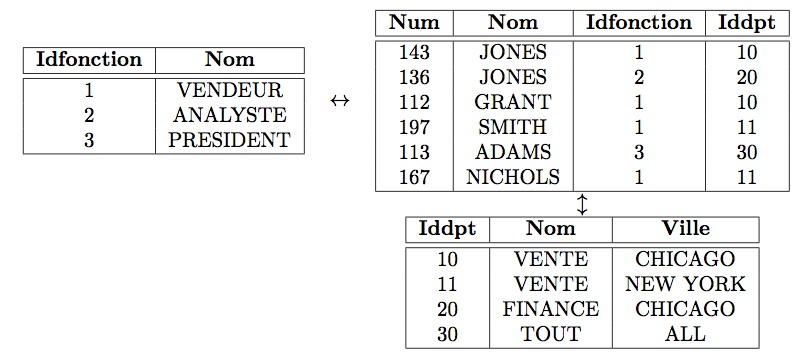

In [257]:
display(i)

#### Exemple : RH

* Requête faisant intervenir 
    * Nom (propre) 
    * Nom (de la fonction)
$\rightarrow$ pas dans la même table
$\rightarrow$ d'où leur jointure
* Possible, car association sur Idfonction    
$\rightarrow$ sert à croiser les informations
* En pratique :
    * Pour chaque enregistrement de Individu
    * On recopie les valeurs des champs de Fonction
    * Correspondant à la valeur de Idfonction de l'enregistrement
* Concrètement : on augmente la table


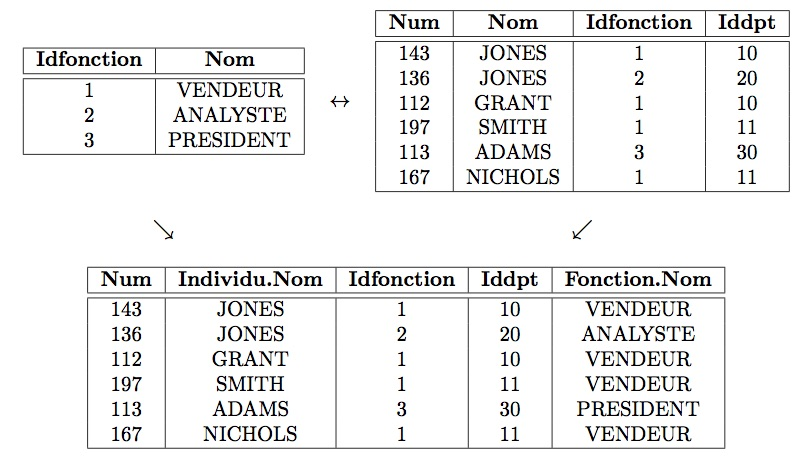

In [259]:
display(l)

#### Syntaxe 
* D'abord la requête (SELECT...)
* Ensuite FROM
* Puis la jointure (nouvelle Table virtuelle)

|Table1 JOIN Table2 ON Table1.champ=Table2.champ|
|--|

$\rightarrow$ Même nom de champ $\rightarrow$ on précise toujours la table

#### Exemple

* Recherche des couples (Nom individu, Nom fonction):

SELECT Individu.Nom,Fonction.Nom FROM     
Individu JOIN Fonction ON Individu.IdFonction=Fonction.IdFonction    
GROUP BY Individu.Nom,Fonction.Nom

#### Principe

Dès qu'une requête fait intervenir des champs de tables différentes   
$\rightarrow$ On cherche à faire une jointure !

* Nombre d'albums de l'artiste 'Nirvana'    
$\rightarrow$ Name (de Artist) et Title/AlbumId (de Album)   
$\rightarrow$ Tables différentes $\rightarrow$ jointure

In [6]:
%%sql
SELECT COUNT(*) FROM Artist JOIN Album ON Artist.ArtistId=Album.ArtistId 
WHERE Artist.Name='Nirvana'

Done.


COUNT(*)
2


* Recherche de leurs titres

Done.


Title,ArtistId
From The Muddy Banks Of The Wishkah [Live],110
Nevermind,110


In [7]:
%%sql
SELECT Album.Title FROM Artist JOIN Album ON Artist.ArtistId=Album.ArtistId 
WHERE Artist.Name='Nirvana'

Done.


Title
From The Muddy Banks Of The Wishkah [Live]
Nevermind


<i>On peut aliaser les noms de tables/champs pour raccourcir les requêtes à jointures</i>  
* Les identifiants des chansons de l'artiste 100    
$\rightarrow$ Track.TrackId et Album.ArtistId    
$\rightarrow$ jointure sur AlbumId

In [39]:
%%sql
SELECT T.TrackId FROM track AS T 
JOIN Album AS A ON T.AlbumId=A.AlbumId WHERE A.ArtistId=100

Done.


TrackId
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711


 * Noms des artistes ayant une chanson qui dure plus de 400000ms    
$\rightarrow$ Artist.Name et Track.Milliseconds      
$\rightarrow$ Pas d'association directe   
$\rightarrow$ <b>Associativité</b> de l'association !   
$\rightarrow$ Table intermédiaire Album

#### Double jointure
(très fréquent)

In [35]:
%%sql
SELECT DISTINCT A.Name FROM Artist AS A 
JOIN Album AS B ON A.ArtistId=B.ArtistId 
JOIN Track AS C ON B.AlbumId=C.AlbumId 
WHERE C.Milliseconds>=4000000

Done.


Name
Battlestar Galactica
Lost


* Noms d'artistes ayant fait au moins une chanson du genre 1    
$\rightarrow$ Artist.Name et Track.GenreId    
$\rightarrow$ jointure Artist/Album sur ArtistId    
$\rightarrow$ jointure Album/Track sur AlbumId

Done.


Name
AC/DC
Accept
Aerosmith
Alanis Morissette
Alice In Chains
Audioslave
Led Zeppelin
Frank Zappa & Captain Beefheart
Queen
Kiss


In [267]:
%%sql
SELECT DISTINCT Ar.Name FROM Artist AS Ar JOIN
Album AS Al ON Ar.ArtistId=Al.ArtistId JOIN
Track AS T ON T.AlbumId=Al.AlbumId 
WHERE T.GenreId=1

Done.


Name
AC/DC
Accept
Aerosmith
Alanis Morissette
Alice In Chains
Audioslave
Led Zeppelin
Frank Zappa & Captain Beefheart
Queen
Kiss


* Noms d'artistes ayant fait des morceaux du genre 'Jazz'    
$\rightarrow$ Artist.Name, Genre.Name
$\rightarrow$ jointure Artist/Album sur ArtistId    
$\rightarrow$ jointure Album/Track sur AlbumId    
$\rightarrow$ jointure Track/Genre sur GenreId

#### Triple jointure

In [41]:
%%sql
SELECT DISTINCT Artist.Name FROM Artist 
JOIN Album ON Album.ArtistId=Artist.ArtistId 
JOIN Track ON Track.AlbumId=Album.AlbumId 
JOIN Genre ON Track.GenreId=Genre.GenreId 
WHERE Genre.Name='Jazz' GROUP BY Artist.Name

Done.


Name
Aaron Goldberg
Aisha Duo
Antônio Carlos Jobim
Billy Cobham
Dennis Chambers
Gene Krupa
Gilberto Gil
Incognito
Miles Davis
Spyro Gyra


## Produit cartésien de tables


* Comme le produit cartésien d'ensemble
* Augmente les enregistrements en les concaténant
* Déclaration table1,table2,...,tablen
* On écrit tous les n-uplets concaténés d'enregistrements possible   
$\rightarrow$ peuvent ne rien représenter

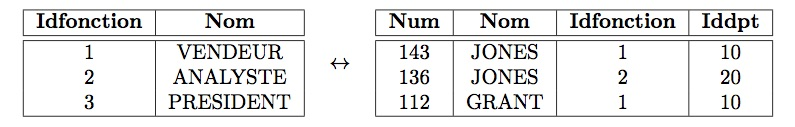

In [272]:
display(m)

Effectuons leur produit cartésien   
$\rightarrow$ Contiendra $3\times 3=9$ enregistrements   
$\rightarrow$ IdFonction apparaîtra sur 2 colonnes

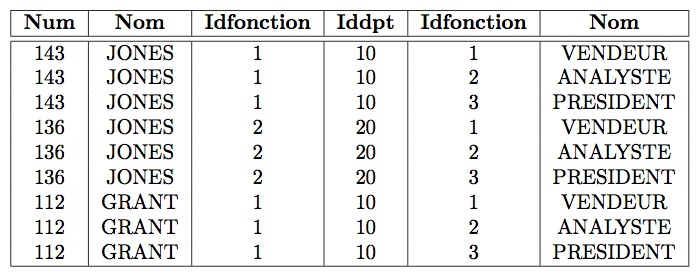

In [273]:
display(n)

In [38]:
%%sql
SELECT * FROM Album,Artist

Done.


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


* Beaucoup de lignes (2,3,4,6,8,9) ne représentent pas une situation réelle
* Pour avoir des associations véritables   
$\rightarrow$ Préciser ce que l'on ne conserve   
$\rightarrow$ Clause WHERE

#### Exemple RH
Les deux requêtes équivalentes (sauf IdFonction- apparait 2 fois) :

* SELECT \* FROM Individu JOIN Fonction    
    ON Individu.IdFonction=Fonction.IdFonction

* SELECT \* FROM Individu,Fonction    
    WHERE Individu.IdFonction=Fonction.IdFonction

# OU TROUVER DES BD

* https://chinookdatabase.codeplex.com

* https://northwinddatabase.codeplex.com

* http://public.opendatasoft.com/explore/?sort=modified

* http://exoplanetes.esep.pro/index.php/base-de-donnees-fr

* http://adresse.data.gouv.fr/

* http://www.insee.fr/fr/bases-de-donnees/

* http://sql.sh/blog/

# AUTRES MOYEN D'INTERROGATION DE BD

* En utilisant le package sqlite3 de Python et en travaillant par exemple avec Spyder
* En utilisant le module (<i>add-on</i>) SQLite Manager de Mozilla Firefox.
* En tapant des requêtes SQL directement dans un tableur (OpenOffice, LibreOffice, Excel).
* En employant, en ligne, le gestionnaire de la BD MONDIAL administrée par l'université de Göttingen accessible à l'adresse http://www.semwebtech.org/sqlfrontend/. Le SGBD étant Oracle, il faut adapter la syntaxe.
* En utilisant via un navigateur l'interface phpMyAdmin.

In [30]:
%sql CREATE TABLE Individu (Num INTEGER PRIMARY KEY AUTOINCREMENT,Nom VARCHAR(128),Idfonction INTEGER,Iddpt INTEGER)

(sqlite3.OperationalError) table Individu already exists [SQL: u'CREATE TABLE Individu (Num INTEGER PRIMARY KEY AUTOINCREMENT,Nom VARCHAR(128),Idfonction INTEGER,Iddpt INTEGER)']


In [31]:
%sql INSERT INTO Individu (Nom,Idfonction,Iddpt) VALUES ('JONES',1,10),('JONES',2,20),('GRANT',1,10),('SMITH',1,11),('ADAMS',3,30),('NICHOLS',1,11)

6 rows affected.


[]

In [7]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [22]:
%%sql 
sqlite:///Chinook_Sqlite.sqlite

u'Connected: None@Chinook_Sqlite.sqlite'

In [12]:
%sql PRAGMA table_info(Artist)

Done.


cid,name,type,notnull,dflt_value,pk
0,ArtistId,INTEGER,1,None,1
1,Name,NVARCHAR(120),0,None,0


In [31]:
%sql SELECT name FROM sqlite_master WHERE type='table'

Done.


name
sqlite_sequence


In [14]:
%sql DROP TABLE Fonction

Done.


[]

In [15]:
%sql DROP TABLE Departement

Done.


[]

In [17]:
%sql DROP TABLE Individus

Done.


[]

In [18]:
%sql DROP TABLE Employes

Done.


[]

In [21]:
%sql SELECT name FROM sqlite_master WHERE type='table'

Done.


name
Individu
sqlite_sequence
